In [ ]:
!wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -R 'index*' -erobots=off http://archive.stsci.edu/pub/kepler/lightcurves//0014/001429092/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
%matplotlib inline
import lightkurve as lk

In [ ]:
curve_path= "/content/kplr001429092-2011177032512_llc.fits"
fits_file = fits.open(curve_path)
fits_file.info()

Filename: /content/kplr001429092-2011177032512_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4768R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


In [ ]:
print(fits_file[1].columns)

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [ ]:
tb_data = Table(fits_file[1].data)
tb_data

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5155889888483,-0.0013694311,34237,11005.416,3.6229792,792.20764,0.29091147,nan,nan,0,nan,nan,nan,nan,16.161273446752205,0.00036608378,619.416580819177,0.0003703294,-0.06738697,-0.044312976
808.5360233514875,-0.0013686685,34238,11006.248,3.6230052,792.0485,0.2906604,16643.0,5.6212726,262144,nan,nan,nan,nan,16.161766299578744,0.00036609266,619.417467671087,0.00037027526,-0.06716792,-0.04373323
808.5564577143596,-0.0013679056,34239,11002.246,3.6227348,791.6053,0.29112047,16641.611,5.621402,262144,nan,nan,nan,nan,16.161266391451388,0.0003662407,619.4177656365385,0.00037055666,-0.06696816,-0.043838907
808.5768920775736,-0.0013671424,34240,11009.767,3.6234016,793.0827,0.29081118,16651.156,5.6237254,262144,nan,nan,nan,nan,16.16188299847891,0.00036613812,619.4175383908821,0.00037049456,-0.066713065,-0.043165963
808.5973264409113,-0.0013663791,34241,11010.581,3.623554,792.06757,0.29106662,16648.662,5.6250315,262144,nan,nan,nan,nan,16.162480826630837,0.00036614432,619.418129818267,0.0003704805,-0.06623596,-0.04284438
808.617760904599,-0.0013656154,34242,11005.815,3.6229873,791.24884,0.29086694,16640.357,5.624555,262144,nan,nan,nan,nan,16.16193564042898,0.00036602645,619.4171982854848,0.00037041327,-0.066319816,-0.042800147
808.6381952685115,-0.0013648515,34243,11016.079,3.6238613,791.44635,0.2911785,16650.012,5.6280446,262144,nan,nan,nan,nan,16.162933121718844,0.0003660169,619.4191775508549,0.00037027957,-0.065691814,-0.042316988
808.6586295326633,-0.0013640873,34244,11019.403,3.6242797,791.3228,0.29090253,16650.14,5.6275864,262144,nan,nan,nan,nan,16.16332404372025,0.00036577074,619.4184256500392,0.00037021886,-0.06531295,-0.04196272
808.6790639970495,-0.001363323,34245,11019.351,3.624184,790.8896,0.29112422,16649.637,5.6259003,262144,nan,nan,nan,nan,16.16300838619768,0.000365669,619.419266047064,0.00037003495,-0.065609366,-0.041997083


In [ ]:
tb_data.columns

<TableColumns names=('TIME','TIMECORR','CADENCENO','SAP_FLUX','SAP_FLUX_ERR','SAP_BKG','SAP_BKG_ERR','PDCSAP_FLUX','PDCSAP_FLUX_ERR','SAP_QUALITY','PSF_CENTR1','PSF_CENTR1_ERR','PSF_CENTR2','PSF_CENTR2_ERR','MOM_CENTR1','MOM_CENTR1_ERR','MOM_CENTR2','MOM_CENTR2_ERR','POS_CORR1','POS_CORR2')>

In [ ]:
tb_data.info()

<Table length=4768>
      name       dtype  n_bad
--------------- ------- -----
           TIME float64    65
       TIMECORR float32     0
      CADENCENO   int32     0
       SAP_FLUX float32   112
   SAP_FLUX_ERR float32   112
        SAP_BKG float32   112
    SAP_BKG_ERR float32   112
    PDCSAP_FLUX float32   158
PDCSAP_FLUX_ERR float32   158
    SAP_QUALITY   int32     0
     PSF_CENTR1 float64  4768
 PSF_CENTR1_ERR float32  4768
     PSF_CENTR2 float64  4768
 PSF_CENTR2_ERR float32  4768
     MOM_CENTR1 float64   112
 MOM_CENTR1_ERR float32   112
     MOM_CENTR2 float64   112
 MOM_CENTR2_ERR float32   112
      POS_CORR1 float32   107
      POS_CORR2 float32   107


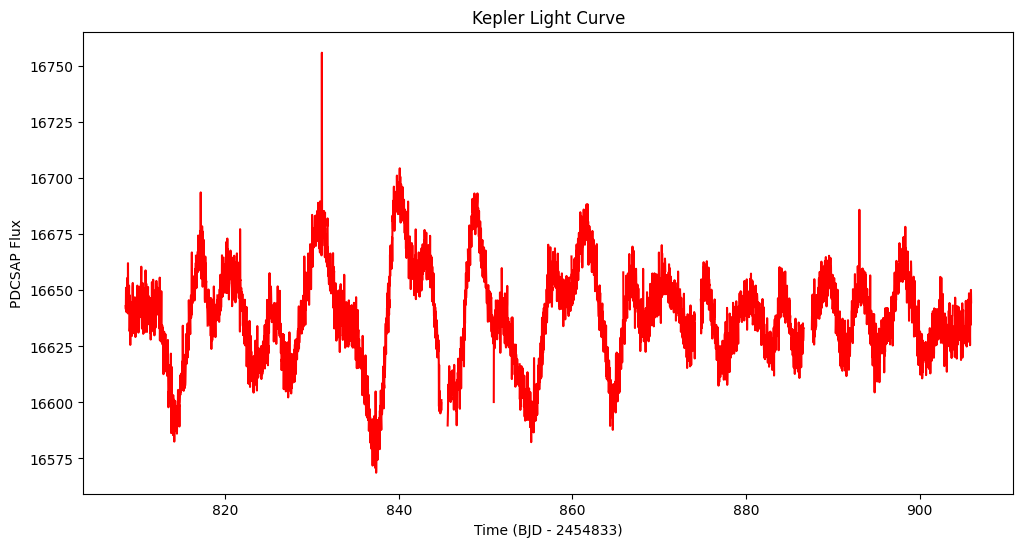

In [ ]:
time = tb_data['TIME']
flux = tb_data['PDCSAP_FLUX']

plt.figure(figsize=(12, 6))
plt.plot(time, flux, '-', markersize=2, color="r")
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('PDCSAP Flux')
plt.title('Kepler Light Curve')
plt.show()

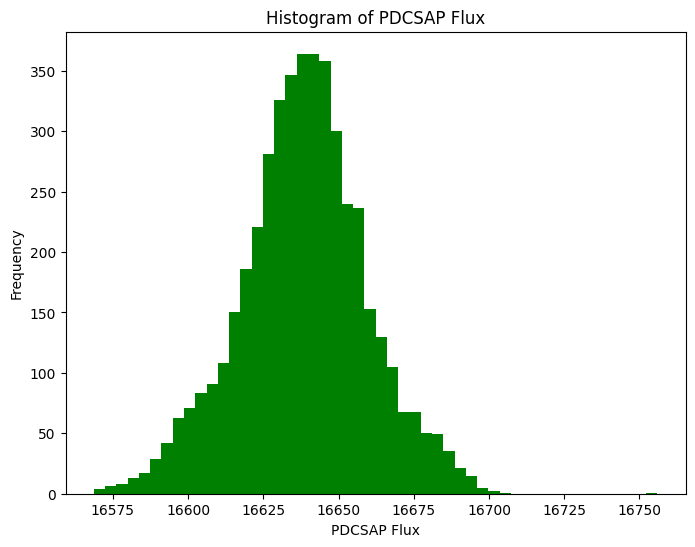

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(flux, bins=50, color ="g")
plt.xlabel('PDCSAP Flux')
plt.ylabel('Frequency')
plt.title('Histogram of PDCSAP Flux')
plt.show()

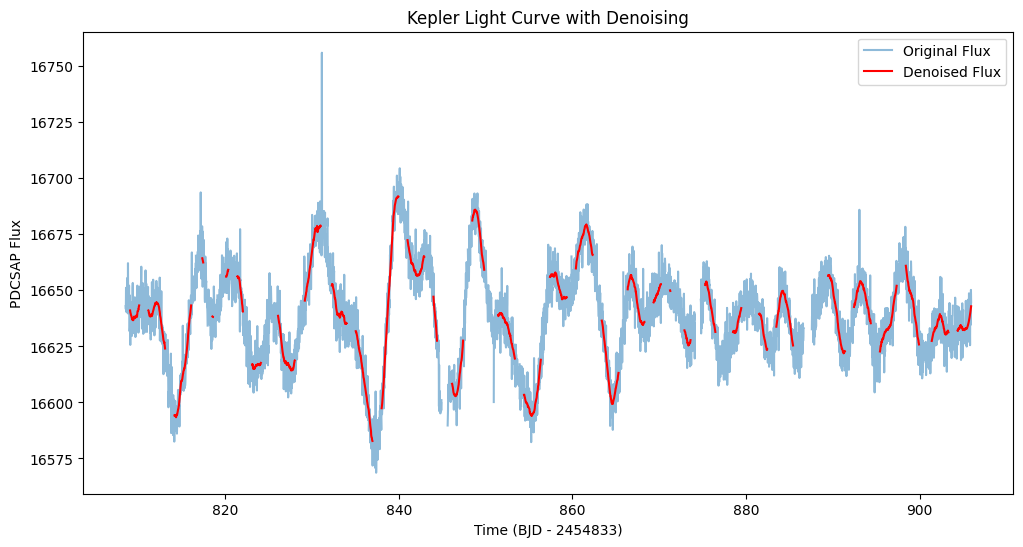

In [ ]:

from scipy.signal import savgol_filter

# applying Savitzky-Golay filter for denoising
window_length = 51
polyorder = 3
denoised_flux = savgol_filter(flux, window_length, polyorder)

plt.figure(figsize=(12, 6))
plt.plot(time, flux, '-', label='Original Flux', alpha=0.5)
plt.plot(time, denoised_flux, '-', label='Denoised Flux', color='r')
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('PDCSAP Flux')
plt.title('Kepler Light Curve with Denoising')
plt.legend()
plt.show()


In [26]:
!pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54567 sha256=0f163d2d50df670f0bc2273dfd44f2b7e4fb88ee0c3e81d115efc3ee0d55adfe
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [28]:
import numpy as np
from midiutil import MIDIFile

# Assuming 'time' and 'flux' are already available from your light curve data

# Normalize the flux to be between 0 and 1
flux_normalized = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))

# Map the normalized flux to a MIDI note range (21 to 108 for piano)
min_midi_note = 21
max_midi_note = 108
midi_notes = np.int32(flux_normalized * (max_midi_note - min_midi_note) + min_midi_note)

# Optional: Map flux to MIDI velocity for amplitude modulation (0 to 127)
min_velocity = 50
max_velocity = 127
velocity = np.int32(flux_normalized * (max_velocity - min_velocity) + min_velocity)

# Create a new MIDI file
midi_file = MIDIFile(1)  # Single track
track = 0
time_start = 0  # Start time of the first note
midi_file.addTrackName(track, time_start, "Light Curve Sonification")
midi_file.addTempo(track, time_start, 120)  # Set the tempo (120 BPM)

# Add the MIDI notes to the track
duration = 1  # Set the duration for each note (in beats)
for i, note in enumerate(midi_notes):
    time = time_start + i * duration  # Calculate when the note should play
    midi_file.addNote(track, 0, note, time, duration, velocity[i])  # Add the note with velocity

# Write the MIDI file to disk
output_midi_file = "/content/lightcurve_sonification.mid"
with open(output_midi_file, "wb") as midi_out:
    midi_file.writeFile(midi_out)

print(f"Sonification saved to {output_midi_file}")


<ipython-input-28-1a76cb7339b1>:12: RuntimeWarning: invalid value encountered in cast
  midi_notes = np.int32(flux_normalized * (max_midi_note - min_midi_note) + min_midi_note)
<ipython-input-28-1a76cb7339b1>:17: RuntimeWarning: invalid value encountered in cast
  velocity = np.int32(flux_normalized * (max_velocity - min_velocity) + min_velocity)


error: ubyte format requires 0 <= number <= 255

In [30]:
import numpy as np
from midiutil import MIDIFile

flux_normalized = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))

min_midi_note = 21
max_midi_note = 108
midi_notes = np.int32(flux_normalized * (max_midi_note - min_midi_note) + min_midi_note)

# ensuring MIDI notes are within the valid range (0-127)
midi_notes = np.clip(midi_notes, 0, 127)

# mapping flux to MIDI velocity for amplitude modulation (0 to 127)
min_velocity = 50
max_velocity = 127
velocity = np.int32(flux_normalized * (max_velocity - min_velocity) + min_velocity)

velocity = np.clip(velocity, 0, 127) # Clip velocity values
midi_file = MIDIFile(1)  # Single track
track = 0
time_start = 0  # Start time of the first note
midi_file.addTrackName(track, time_start, "Light Curve Sonification")
midi_file.addTempo(track, time_start, 120)

duration = 1  # Set the duration for each note (in beats)
for i, note in enumerate(midi_notes):
    time = time_start + i * duration
    midi_file.addNote(track, 0, note, time, duration, velocity[i])  # Add the note with velocity

output_midi_file = "/content/lightcurve_sonification.mid"
with open(output_midi_file, "wb") as midi_out:
    midi_file.writeFile(midi_out)

print(f"Sonification saved to {output_midi_file}")

Sonification saved to /content/lightcurve_sonification.mid


<ipython-input-30-156fa6372a6b>:12: RuntimeWarning: invalid value encountered in cast
  midi_notes = np.int32(flux_normalized * (max_midi_note - min_midi_note) + min_midi_note)
<ipython-input-30-156fa6372a6b>:20: RuntimeWarning: invalid value encountered in cast
  velocity = np.int32(flux_normalized * (max_velocity - min_velocity) + min_velocity)
